# Lógica Fuzzy

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

### Definindo os espaços dos universos dos antecedentes e consequente.

In [2]:
# antecedentes, que serão as predições indicando o grau de pertencimento de um elemento ao um determinado conjunto.
cv_precision = ctrl.Antecedent(np.arange(0, 1, .01), 'cv_precision')
cv_recall = ctrl.Antecedent(np.arange(0, 1, .01), 'cv_recall')
cv_badrate = ctrl.Antecedent(np.arange(0, 1, .01), 'cv_badrate')

# consequente, que será a avaliação do sistema fuzzy
cv = ctrl.Consequent(np.arange(0, 1.1, .01), 'cv')

### Definindo as funções de pertinência

In [3]:
# cv_precision['baixa'] = fuzz.trimf(cv_precision.universe, [0, 0.05, 0.1])
# cv_precision['media'] = fuzz.trimf(cv_precision.universe, [0.07,0.10,0.15])
# cv_precision['alta'] = fuzz.trimf(cv_precision.universe, [0.15,0.2,1])

# cv_recall['baixa'] = fuzz.trimf(cv_recall.universe, [0, 0.05, 0.07])
# cv_recall['media'] = fuzz.trimf(cv_recall.universe, [0.07,0.10,0.15])
# cv_recall['alta'] = fuzz.trimf(cv_recall.universe, [0.15,0.2,1])

# cv_badrate['baixa'] = fuzz.trimf(cv_badrate.universe, [0, 0.05, 0.07])
# cv_badrate['media'] = fuzz.trimf(cv_badrate.universe, [0.07,0.10,0.15])
# cv_badrate['alta'] = fuzz.trimf(cv_badrate.universe, [0.15,0.2,1])


# cv['baixa'] = fuzz.trimf(cv.universe, [0, 0.05, 0.07])
# cv['media'] = fuzz.trimf(cv.universe, [0.07,0.10,0.15])
# cv['alta'] = fuzz.trimf(cv.universe, [0.15,0.2,1])



# cv_precision['baixa'] = fuzz.gaussmf(cv_precision.universe, 0.05, 0.02)
# cv_precision['media'] = fuzz.gaussmf(cv_precision.universe, 0.11, 0.04)
# cv_precision['alta'] = fuzz.trimf(cv_precision.universe, [0.15,0.2,1])


cv_precision['baixa'] = fuzz.trapmf(cv_precision.universe, [0., 0.01, 0.07, 0.08])#fuzz.sigmf(cv_precision.universe,  0.5, 0.02)
cv_precision['media'] = fuzz.trapmf(cv_precision.universe, [0.07, 0.08, 0.15, 0.16])#fuzz.gaussmf(cv_precision.universe,  0.11, 0.04)
cv_precision['alta'] = fuzz.trapmf(cv_precision.universe, [0.15, 0.16, 0.2, 100]) 

# cv_recall['baixa'] = fuzz.gaussmf(cv_recall.universe, 0.05, 0.02)
# cv_recall['media'] = fuzz.gaussmf(cv_recall.universe, 0.11, 0.04)
# cv_recall['alta'] = fuzz.trimf(cv_recall.universe, [0.15,0.2,1])

cv_recall['baixa'] = fuzz.trapmf(cv_recall.universe, [0., 0.01, 0.07, 0.08])#fuzz.sigmf(cv_recall.universe,  0.5, 0.02)
cv_recall['media'] = fuzz.trapmf(cv_recall.universe, [0.07, 0.08, 0.15, 0.16])#fuzz.gaussmf(cv_recall.universe,  0.11, 0.04)
cv_recall['alta'] = fuzz.trapmf(cv_recall.universe, [0.15, 0.16, 0.2, 100]) 



# cv_badrate['baixa'] = fuzz.gaussmf(cv_badrate.universe,  0.05, 0.02)
# cv_badrate['media'] = fuzz.gaussmf(cv_badrate.universe, 0.11, 0.04)
# cv_badrate['alta'] = fuzz.trimf(cv_badrate.universe, [0.15,0.2,1])



cv_badrate['baixa'] = fuzz.trapmf(cv_badrate.universe, [0., 0.01, 0.07, 0.08])#fuzz.sigmf(cv_badrate.universe,  0.5, 0.02)
cv_badrate['media'] = fuzz.trapmf(cv_badrate.universe, [0.07, 0.08, 0.15, 0.16])#fuzz.gaussmf(cv_badrate.universe,  0.11, 0.04)
cv_badrate['alta'] = fuzz.trapmf(cv_badrate.universe, [0.15, 0.16, 0.2, 100]) 



# resultado da variação
cv['baixa'] = fuzz.trapmf(cv.universe, [0., 0.01, 0.07, 0.08])#fuzz.sigmf(cv.universe,  0.5, 0.02)
cv['media'] = fuzz.trapmf(cv.universe, [0.07, 0.08, 0.15, 0.16])#fuzz.gaussmf(cv.universe,  0.11, 0.04)
cv['alta'] = fuzz.trapmf(cv.universe, [0.15, 0.16, 0.2, 100]) 

### Visualização das funções de pertinência 

c:\Anaconda\envs\artigo\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


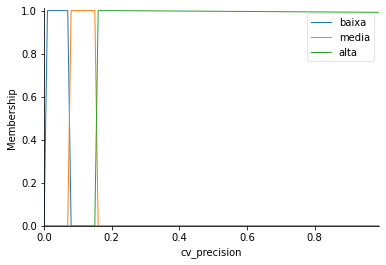

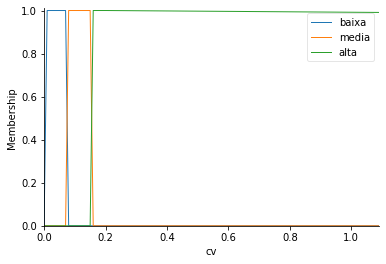

In [4]:
cv_precision.view()

cv.view()

### Definindo regras do sistema 

In [8]:

# regra 1 
regra1 = ctrl.Rule(cv_badrate['alta'], cv['alta'])

# regra 2
regra2 = ctrl.Rule(cv_badrate['media'] | cv_precision['media'], cv['media'])

# regra 3 
regra3 = ctrl.Rule(cv_badrate['baixa'] & cv_precision['media'], cv['media'])

# regra 4 
regra4 = ctrl.Rule(cv_badrate['media'] | cv_precision['alta'], cv['alta'])

# regra 5 
regra5 = ctrl.Rule(cv_badrate['baixa'] & cv_precision['baixa'] & cv_recall['baixa'], cv['baixa'])

# regra 6
regra6 = ctrl.Rule(cv_badrate['media'] & (cv_precision['alta'] |cv_recall['alta']) , cv['alta'])

rule_ctrl = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6])
engine = ctrl.ControlSystemSimulation(rule_ctrl)

### Cáculo da saída do sistema de controle fuzzy

In [13]:

# passa as predições dos modelos para suas respectivas variáveis de entrada
engine.input['cv_precision'] = 0.18
engine.input['cv_recall'] = 0.15
engine.input['cv_badrate'] = 0.05

# calcula a saída do sistema de controle fuzzy
engine.compute()

0.6217673632205964


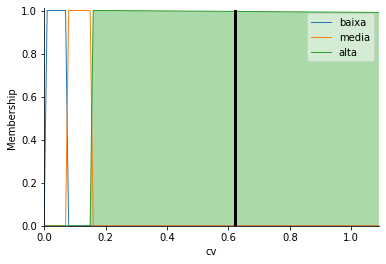

In [14]:
print(engine.output['cv'])
cv.view(sim=engine)